<a href="https://colab.research.google.com/github/sajad-naderzadeh/ML/blob/main/Artificial_intelligence_for_accountability_and_banking_complaints_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excell file to data frame

In [ ]:
# Impot libraries
import openpyxl as pyx
import pandas as pd

In [ ]:
# Define excel workbook and it's workSheet
wb = pyx.load_workbook('orginal.xlsx')
ws_per = wb['ComplaintExtensiveReport']
ws_translated = wb['translated']

KeyError: 'Worksheet translated does not exist.'

# New section

In [ ]:
# Simple test fo correction
print(f"Total number of rows: {ws_per.max_row} \nTotal number columns: {ws_per.max_column}")

Total number of rows: 2658 
Total number columns: 2


In [ ]:
# Define the columns
col1 = [ws_per.cell(row=i, column=1).value
                  for i in range(2, ws_per.max_row+1)]
# len(col1)

col2 = [ws_per.cell(row=i, column=2).value
                  for i in range(2, ws_per.max_row+1)]
# len(col2)

In [ ]:
# Create a data frame
df_col1 = pd.DataFrame(col1, columns=['پاسخ شکایت'])
df_col1['پاسخ شکایت'] = df_col1['پاسخ شکایت'].fillna(0)

df_col2 = pd.DataFrame(col2, columns=['شرح شکایت'])
df_col2['شرح شکایت'] = df_col2['شرح شکایت'].fillna(0)

In [ ]:
full_file = pd.concat([df_col1, df_col2], axis=1, join='inner')
full_file[:200]

,پاسخ شکایت,شرح شکایت
0,با سلام و احترام؛ صلاحیت بررسی موضوع بر عهده و...,با سلام از اذر ماه سال گذشته از طرف نظام مهندس...
1,با سلام و احترام؛\nحسب بررسی به عمل آمده در مو...,با سلام، با توجه به اینکه بایستی مبلغ پانصد می...
2,با سلام و احترام ؛ مشتری گرامی در این خصوص با ...,سلام بنده تاریخ ۱۴۰۱/۱۲/۲۷ یه چک به حسابم خواب...
3,با سلام و احترام؛\nصلاحیت بررسی موضوع عنوان شد...,در تاریخ 15 اسفند ماه سال 1401بابت تفاوت تسهیل...
4,با سلام. لطفا مراتب را با ارائه مستندات قابل ق...,اینجانب محسن تاره از یکی کارمندان بانک ملت بنا...
...,...,...
195,با سلام. لطفا مراتب را به اداره بازرسی شعب است...,چهارشنبه 16 فروردین 1402 جهت شرایط وام فرزندآو...
196,با سلام. مشتری گرامی در تسهیلات قرض الحسنه او...,تاریخ قسط ۱۸هرماه .قسط اسفندماه درتاریخ هفدهم ...
197,با سلام. مشتری گرامی تخصیص و تأیید ارائه دسته ...,اینجانب ابوذر توکلی مشتری بانک فوق دسته چک ده ...
198,با سلام و احترام؛صلاحیت رسیدگی به موضوع یاد شد...,پس چرا جایز ه پیش بینی. واریز نمیشه؟


In [ ]:
# Creating a variable name answers and  add full_file col in that
per_answers = full_file['پاسخ شکایت']
per_questions = full_file['شرح شکایت']
# See how many data that are not string and acceptable
answers_count = 0
question_count = 0
for i in per_answers:
  if type(i) != str:
    answers_count += 1

for j in per_questions:
  if type(j) != str:
    question_count += 1

print(f"From {len(per_answers)} persian answers, there are {answers_count} unAcceptable datas\n")
print(f"From {len(per_questions)} persian answers, there are {question_count} unAcceptable datas\n")

From 2657 persian answers, there are 131 unAcceptable datas

From 2657 persian answers, there are 0 unAcceptable datas



In [ ]:
# Remove numbers from items and remove unAcceptable items
import re, random
for i in range(0, 2657):
  if type(per_answers[i]) == str:
    per_answers[i] = re.sub(r'\d+', '', per_answers[i])
    per_questions[i] = re.sub(r'\d+', '', per_questions[i])
  else:
    per_answers.drop(i, inplace = True)
    per_questions.drop(i, inplace = True)

# Create a random index for test the code
if len(per_answers) == len(per_questions):
  random_index = random.randint(0, len(per_answers))

print(per_answers[random_index])
print('\n', len(per_answers))
print(per_questions[random_index])
print('\n', len(per_questions))


با سلام و احترام ؛
مشتری گرامی حسب بررسی و اعلام اداره بازرسی و مبارزه با پولشویی مدیریت شعب استان خراسان رضوی ضمانت آقای مهدوی نژاد به اشتباه در تعهدات شما  ثبت گردیده بود که  حسب اعلام  اداره بازرسی  اصلاح گردید .

 2526
به نام خدا
با درود و احترام
به استحضار می رساند چندی قبل (بهمن ماه ) از طریق نرم افزار همراه بانک ملت منوی "تعهدات غیر مستقیم" متوجه شدم که بدون اطلاع اینجانب، ضامن شخصی (حسن مهدوی نژاد) شدم که به هیچ عنوان نمیشناسم. به همین دلیل به شعبه مرکزی قوچان مراجعه کردم و اعتراض کردم که اپراتور بانک با خنده بیان داشت که اشتباه شده است و ظرف مدت یک هفته تا  روز مشکل حل خواهد شد. اما همچنان من به عنوان ضامن آن شخص ثبت شده ام و تاکنون مشکل مذکور مرتفع نشده است. ضمن اینکه اخیرا متوجه شدم که شخص نامبرده روابط خوبی با رئیس شعبه مرکزی قوچان داشته و به احتمال فراوان رئیس شعبه از اعتبار و خوش حسابی و مدارک اینجانب سوء استفاده کرده و از طریق ضمانت ساختگی من برای ایشان درخواست وام نموده است. لذا خواهشمندم در صورت امکان به شکایت اینجانب به صورت عاجل رسیدگی فرموده و پس از بررسی کامل پروند

In [ ]:
full_file_per = pd.concat([per_answers, per_questions], axis=1, join='inner')
full_file_per[:200]

,پاسخ شکایت,شرح شکایت
0,با سلام و احترام؛ صلاحیت بررسی موضوع بر عهده و...,با سلام از اذر ماه سال گذشته از طرف نظام مهندس...
1,با سلام و احترام؛\nحسب بررسی به عمل آمده در مو...,با سلام، با توجه به اینکه بایستی مبلغ پانصد می...
2,با سلام و احترام ؛ مشتری گرامی در این خصوص با ...,سلام بنده تاریخ // یه چک به حسابم خوابوندم متا...
3,با سلام و احترام؛\nصلاحیت بررسی موضوع عنوان شد...,در تاریخ اسفند ماه سال بابت تفاوت تسهیلات مسک...
4,با سلام. لطفا مراتب را با ارائه مستندات قابل ق...,اینجانب محسن تاره از یکی کارمندان بانک ملت بنا...
...,...,...
198,با سلام و احترام؛صلاحیت رسیدگی به موضوع یاد شد...,پس چرا جایز ه پیش بینی. واریز نمیشه؟
199,با سلام و احترام؛صلاحیت رسیدگی به موضوع یاد شد...,خطای منقضی شدن امضای ملت، که متأسفانه بعداز نز...
200,با سلام و احترام ؛\nمشتری گرامی برای چه تسهیلا...,ماه ثبت نام کردم وام بهم نمیدن
201,با سلام، احتراما به استحضار می رساند؛ قسمتی از...,سال وام برداشت کردم قبل اینکه وام بگیرم درصد...


In [ ]:
!pip install googletrans==4.0.0rc1

In [ ]:
# Write the translated columns into translated sheet
### for you  sajad ---->STEP1 `range(1541, 2526)`
from googletrans import Translator
translator = Translator()
translated_answers = []
translated_questions = []
row_pos = 2
for k in range(0, 2526):
    try:
        translated_answer = translator.translate(per_answers[k], src="fa", dest="en").text
        translated_question = translator.translate(per_questions[k], src="fa", dest="en").text
        translated_answers.append(translated_answer)
        translated_questions.append(translated_question)
    except Exception as e:
        print(f"Error translating at index {k}: {e}")

    print(k)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
Error translating at index 146: 146
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
Error translating at index 161: 161
161
Error translating at index 162: 162
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
Error translating at index 222: 222
222
223
224
225
Error translating at index 226: 226
226
227
228
229
230
231
23

IndexError: list index out of range

In [ ]:
### STEP2
len(translated_answers)

1511

In [ ]:
### for you sajad --->STEP3 `range(0, len(translated_answers))
for z in range(0, 1511):
  ws_translated["A" + str(row_pos)].value = translated_answers[z]
  ws_translated["B" + str(row_pos)].value = translated_questions[z]
  row_pos += 1
print(ws_translated['A2'].value)
print(ws_translated['B2'].value)

Greetings and Regards;The jurisdiction of the issue is the responsibility of the Faraban Bank Complaints Unit based on Mellat Bank's Personal Banking Management Unit.----- track internal.
Hi, I was introduced to the Faraban System for the facility since December last year to receive job information.I have contacted Farabank for more than a month, but it didn't work out.


In [ ]:
# Load the Excel file
df = pd.read_excel("/content/orginal_translated.xlsx",  sheet_name='translated')

# Define the columns to check for duplicates
columns_to_check = ['Questions', 'Answers']  # Replace with your column names

# Remove duplicate rows based on the specified columns
df_cleaned = df.drop_duplicates(subset=columns_to_check)

print("Duplicates removed and cleaned file saved successfully.")
df_cleaned

Duplicates removed and cleaned file saved successfully.


,Answers,Questions
0,Greetings and Regards;The jurisdiction of the ...,"Hi, I was introduced to the Faraban System for..."
1,Greetings and Regards;\nAccording to the revie...,"Hi, given that the amount of 500 million USD b..."
2,Greetings and Regards ;Dear Customer In this r...,Hi Date Date // I have a check to my account. ...
3,Greetings and Regards;\nIt is not the responsi...,"In March of the year, the amount of eighty -th..."
4,Hello.Please report to the Fars Province Branc...,Mohsen Tara from one of the employees of Mella...
...,...,...
1506,Greetings and Regards\nPlease follow the issue...,Hello\nDeputy Bank of Mellat Bank of Ahvaz Bra...
1507,"Hello.Dear Customer, please contact the West A...",Zahra Mohammadkhah has registered the National...
1508,"Hi, please refer to the province's inspection ...",Hello\nI have been applying for a child loan s...
1509,"Hi, please refer to the province's inspection ...",Greetings and respect to accept the sponsors b...


In [ ]:
output_file_path = '/content/orginal - Copy.xlsx'  # Replace with your desired output file path
df_cleaned.to_excel(output_file_path, sheet_name='translated', index=False)

In [ ]:
wb.save('orginal_translated.xlsx')

# Back to work

In [ ]:
!pip install transformers
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration, AutoTokenizer

In [ ]:
class LoRALossT5(T5ForConditionalGeneration):
    def forward(self, input_ids, labels=None):
        outputs = self.model(input_ids=input_ids, labels=labels)
        input_embeddings = self.get_input_embeddings()(input_ids)
        label_embeddings = self.get_output_embeddings()(labels)
        loss = custom_loss_function(outputs.logits, labels, input_embeddings, label_embeddings)
        return loss

def custom_loss_function(logits, labels, input_embeddings, label_embeddings, alpha=0.1):
    ce_loss = torch.nn.CrossEntropyLoss()(logits, labels)
    alignment_loss = alpha * torch.nn.functional.cosine_similarity(input_embeddings, label_embeddings).mean()
    total_loss = ce_loss + alignment_loss
    return total_loss

In [ ]:
model = LoRALossT5.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base')

In [ ]:
from sklearn.model_selection import train_test_split
# Define your long list of data
data_list = answers  # Your long list of data

# Define the size of the test set (e.g., 20%)
test_size = 0.2

# Randomly split the data into training and testing sets
train_data, test_data = train_test_split(data_list, test_size=test_size, random_state=42)
train_data = list(train_data)
test_data = list(test_data)
print(len(train_data))
print(len(test_data))

In [ ]:
# Define your training data and optimizer
training_data = train_data
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
from tqdm import tqdm

# Define your training and testing data
training_data = train_data
testing_data = test_data

# Define optimizer and other hyperparameters
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
num_epochs = 50

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    train_batches = len(training_data)

    for batch_idx, (input_batch, label_batch) in enumerate(tqdm(training_data, desc=f"Epoch {epoch+1}", total=train_batches)):
        input_ids = tokenizer(input_batch, return_tensors='pt', padding=True, truncation=True)['input_ids']
        label_ids = tokenizer(label_batch, return_tensors='pt', padding=True, truncation=True)['input_ids']

        optimizer.zero_grad()

        loss = model(input_ids=input_ids, labels=label_ids)

        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        avg_train_loss = total_train_loss / (batch_idx + 1)

        # Display progress and train loss
        tqdm.write(f"Train Loss: {avg_train_loss:.4f}")

    # Testing loop
    model.eval()
    total_test_loss = 0
    test_batches = len(testing_data)

    with torch.no_grad():
        for input_batch, label_batch in tqdm(testing_data, desc="Testing", total=test_batches):
            input_ids = tokenizer(input_batch, return_tensors='pt', padding=True, truncation=True)['input_ids']
            label_ids = tokenizer(label_batch, return_tensors='pt', padding=True, truncation=True)['input_ids']

            loss = model(input_ids=input_ids, labels=label_ids)
            total_test_loss += loss.item()

        avg_test_loss = total_test_loss / test_batches
        tqdm.write(f"Test Loss: {avg_test_loss:.4f}")

In [ ]:
# Assuming train_data is your training data and model is your T5 model
import torch.nn as nn
# Define the number of epochs
num_epochs = 50

# Define your optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for data in train_data:
        input_ids = data['input_ids']
        attention_mask = data['attention_mask']
        target = data['target']

        optimizer.zero_grad()

        output = model(input_ids, attention_mask=attention_mask, labels=target)
        loss = criterion(output.logits, target)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_data)
    print(f'Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}')

print('Training completed.')

full code

/////////////////////////////////////

In [ ]:
!pip install transformers torch peft openpyxl

# Import libraries
import openpyxl as pyx
import pandas as pd
import re
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch
from peft import get_peft_model, LoraConfig, TaskType
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Load Excel workbook and worksheet
wb = pyx.load_workbook('orginal.xlsx')
ws = wb['ComplaintExtensiveReport']

# Print total number of rows and columns
print(f"Total number of rows: {ws.max_row} \nTotal number of columns: {ws.max_column}")

# Define the columns
col1 = [ws.cell(row=i, column=1).value for i in range(2, ws.max_row + 1)]
col2 = [ws.cell(row=i, column=2).value for i in range(2, ws.max_row + 1)]

# Create dataframes and fill NaN values with 0
df_col1 = pd.DataFrame(col1, columns=['پاسخ شکایت'])
df_col1['پاسخ شکایت'] = df_col1['پاسخ شکایت'].fillna(0)

df_col2 = pd.DataFrame(col2, columns=['شرح شکایت'])
df_col2['شرح شکایت'] = df_col2['شرح شکایت'].fillna(0)
#translat
from googletrans import Translator

translator = Translator()

translated = translator.translate("سلام", src="fa", dest="en")

print(translated.text)

new_answers = []
for i in answers[:2]:
  i = translator.translate(i ,src="fa", dest="en").text
  new_answers.append(i)
print(new_answers)

# Concatenate dataframes
full_file = pd.concat([df_col1, df_col2], axis=1, join='inner')
print(full_file.head(200))

# Clean the 'پاسخ شکایت' column by removing numbers and unaccepted items
answers = full_file['پاسخ شکایت']

# Remove numbers from items and drop unaccepted items
for i in range(len(answers)):
    if isinstance(answers[i], str):
        answers[i] = re.sub(r'\d+', '', answers[i])
    else:
        answers.drop(i, inplace=True)

print(answers.head(100))
print(len(answers))

# Concatenate cleaned answers with df_col2
full_file = pd.concat([answers, df_col2], axis=1, join='inner')
print(full_file.head(200))

# Load the tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Define LoRA configuration and wrap the T5 model with LoRA
lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    r=8,  # Rank of the low-rank matrices
    lora_alpha=16,  # Alpha parameter
    lora_dropout=0.1,  # Dropout rate for LoRA layers
)
model = T5ForConditionalGeneration.from_pretrained("t5-small")
model = get_peft_model(model, lora_config)

# Split data into training and testing sets
data_list = new_answers
train_data, test_data = train_test_split(data_list, test_size=0.2, random_state=42)

# Training loop
num_epochs = 1
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0

    for input_batch in tqdm(train_data, desc=f"Epoch {epoch+1}/{num_epochs}"):
        input_ids = tokenizer(input_batch, return_tensors='pt', padding=True, truncation=True).input_ids
        labels = input_ids.clone()

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_data)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}")

    # Testing loop
    model.eval()
    total_test_loss = 0

    with torch.no_grad():
        for input_batch in tqdm(test_data, desc="Testing"):
            input_ids = tokenizer(input_batch, return_tensors='pt', padding=True, truncation=True).input_ids
            labels = input_ids.clone()

            outputs = model(input_ids=input_ids, labels=labels)
            loss = outputs.loss
            total_test_loss += loss.item()

        avg_test_loss = total_test_loss / len(test_data)
        print(f"Epoch {epoch+1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

print('Training completed.')

# Function to ask and get answer from the model
def ask_question(question):
    model.eval()
    with torch.no_grad():
        input_ids = tokenizer(question, return_tensors='pt', padding=True, truncation=True).input_ids
        generated_ids = model.generate(input_ids)
        answer = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
        return translator.translate(user_input, src="en", dest="fa").text

# Example usage
while True:
    user_input = input("Ask a question: ")
    #////
    user_input = translator.translate(user_input, src="fa", dest="en").text
    if user_input.lower() in ["exit", "quit"]:
        break
    response = ask_question(user_input)
    print("Answer:", response)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 3.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


FileNotFoundError: [Errno 2] No such file or directory: 'orginal.xlsx'

newww


In [ ]:
!pip install transformers torch peft openpyxl googletrans==4.0.0-rc1

# Import libraries
import openpyxl as pyx
import pandas as pd
import re
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch
from peft import get_peft_model, LoraConfig, TaskType
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from googletrans import Translator

# Load Excel workbook and worksheet
wb = pyx.load_workbook('orginal.xlsx')
ws = wb['ComplaintExtensiveReport']

# Print total number of rows and columns
print(f"Total number of rows: {ws.max_row} \nTotal number of columns: {ws.max_column}")

# Define the columns
col1 = [ws.cell(row=i, column=1).value for i in range(2, ws.max_row + 1)]
col2 = [ws.cell(row=i, column=2).value for i in range(2, ws.max_row + 1)]

# Create dataframes and fill NaN values with 0
df_col1 = pd.DataFrame(col1, columns=['پاسخ شکایت'])
df_col1['پاسخ شکایت'] = df_col1['پاسخ شکایت'].fillna(0)

df_col2 = pd.DataFrame(col2, columns=['شرح شکایت'])
df_col2['شرح شکایت'] = df_col2['شرح شکایت'].fillna(0)

# Translate
translator = Translator()

new_answers = []
for answer in df_col1['پاسخ شکایت'][:2]:  # Limit to first 2 for example
    if answer != 0:
        translated_text = translator.translate(answer, src="fa", dest="en").text
        new_answers.append(translated_text)
    else:
        new_answers.append(answer)

print(new_answers)

# Concatenate dataframes
full_file = pd.concat([df_col1, df_col2], axis=1, join='inner')
print(full_file.head(200))

# Clean the 'پاسخ شکایت' column by removing numbers and unaccepted items
answers = full_file['پاسخ شکایت']

# Remove numbers from items and drop unaccepted items
for i in range(len(answers)):
    if isinstance(answers[i], str):
        answers[i] = re.sub(r'\d+', '', answers[i])
    else:
        answers.drop(i, inplace=True)

print(answers.head(100))
print(len(answers))

# Concatenate cleaned answers with df_col2
full_file = pd.concat([answers, df_col2], axis=1, join='inner')
print(full_file.head(200))

# Load the tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Define LoRA configuration and wrap the T5 model with LoRA
lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    r=8,  # Rank of the low-rank matrices
    lora_alpha=16,  # Alpha parameter
    lora_dropout=0.1,  # Dropout rate for LoRA layers
)
model = T5ForConditionalGeneration.from_pretrained("t5-small")
model = get_peft_model(model, lora_config)

# Split data into training and testing sets
data_list = new_answers
train_data, test_data = train_test_split(data_list, test_size=0.2, random_state=42)

# Training loop
num_epochs = 150
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0

    for input_batch in tqdm(train_data, desc=f"Epoch {epoch+1}/{num_epochs}"):
        input_ids = tokenizer(input_batch, return_tensors='pt', padding=True, truncation=True).input_ids
        labels = input_ids.clone()

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_data)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}")

    # Testing loop
    model.eval()
    total_test_loss = 0

    with torch.no_grad():
        for input_batch in tqdm(test_data, desc="Testing"):
            input_ids = tokenizer(input_batch, return_tensors='pt', padding=True, truncation=True).input_ids
            labels = input_ids.clone()

            outputs = model(input_ids=input_ids, labels=labels)
            loss = outputs.loss
            total_test_loss += loss.item()

        avg_test_loss = total_test_loss / len(test_data)
        print(f"Epoch {epoch+1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

print('Training completed.')

# Function to ask and get answer from the model
def ask_question(question):
    model.eval()
    with torch.no_grad():
        input_ids = tokenizer(question, return_tensors='pt', padding=True, truncation=True).input_ids
        generated_ids = model.model.generate(input_ids)
        answer = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
        return translator.translate(answer, src="en", dest="fa").text

# Example usage
while True:
    user_input = input("Ask a question: ")
    user_input_translated = translator.translate(user_input, src="fa", dest="en").text
    if user_input_translated.lower() in ["exit", "quit"]:
        break
    response = ask_question(user_input_translated)
    print("Answer:", response)


KeyboardInterrupt: Interrupted by user

Epoch 1/150: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Epoch 1/150, Train Loss: 0.0712


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


Epoch 1/150, Test Loss: 0.0729


Epoch 2/150: 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


Epoch 2/150, Train Loss: 0.0769


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


Epoch 2/150, Test Loss: 0.0728


Epoch 3/150: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Epoch 3/150, Train Loss: 0.1099


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


Epoch 3/150, Test Loss: 0.0727


Epoch 4/150: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Epoch 4/150, Train Loss: 0.0770


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


Epoch 4/150, Test Loss: 0.0727


Epoch 5/150: 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


Epoch 5/150, Train Loss: 0.0618


Testing: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Epoch 5/150, Test Loss: 0.0726


Epoch 6/150: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


Epoch 6/150, Train Loss: 0.0667


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


Epoch 6/150, Test Loss: 0.0724


Epoch 7/150: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


Epoch 7/150, Train Loss: 0.0604


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


Epoch 7/150, Test Loss: 0.0724


Epoch 8/150: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


Epoch 8/150, Train Loss: 0.0780


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]


Epoch 8/150, Test Loss: 0.0723


Epoch 9/150: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


Epoch 9/150, Train Loss: 0.1521


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]


Epoch 9/150, Test Loss: 0.0722


Epoch 10/150: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


Epoch 10/150, Train Loss: 0.0325


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


Epoch 10/150, Test Loss: 0.0722


Epoch 11/150: 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


Epoch 11/150, Train Loss: 0.1060


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


Epoch 11/150, Test Loss: 0.0722


Epoch 12/150: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


Epoch 12/150, Train Loss: 0.0464


Testing: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Epoch 12/150, Test Loss: 0.0721


Epoch 13/150: 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


Epoch 13/150, Train Loss: 0.0737


Testing: 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


Epoch 13/150, Test Loss: 0.0721


Epoch 14/150: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


Epoch 14/150, Train Loss: 0.0593


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


Epoch 14/150, Test Loss: 0.0721


Epoch 15/150: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


Epoch 15/150, Train Loss: 0.1838


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


Epoch 15/150, Test Loss: 0.0720


Epoch 16/150: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


Epoch 16/150, Train Loss: 0.1282


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


Epoch 16/150, Test Loss: 0.0719


Epoch 17/150: 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]


Epoch 17/150, Train Loss: 0.0572


Testing: 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Epoch 17/150, Test Loss: 0.0718


Epoch 18/150: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


Epoch 18/150, Train Loss: 0.0618


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]


Epoch 18/150, Test Loss: 0.0717


Epoch 19/150: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


Epoch 19/150, Train Loss: 0.0501


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


Epoch 19/150, Test Loss: 0.0717


Epoch 20/150: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


Epoch 20/150, Train Loss: 0.0603


Testing: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Epoch 20/150, Test Loss: 0.0716


Epoch 21/150: 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]


Epoch 21/150, Train Loss: 0.0697


Testing: 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch 21/150, Test Loss: 0.0715


Epoch 22/150: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Epoch 22/150, Train Loss: 0.0472


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


Epoch 22/150, Test Loss: 0.0714


Epoch 23/150: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Epoch 23/150, Train Loss: 0.0884


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


Epoch 23/150, Test Loss: 0.0712


Epoch 24/150: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Epoch 24/150, Train Loss: 0.1240


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


Epoch 24/150, Test Loss: 0.0711


Epoch 25/150: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Epoch 25/150, Train Loss: 0.0736


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


Epoch 25/150, Test Loss: 0.0711


Epoch 26/150: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Epoch 26/150, Train Loss: 0.0927


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


Epoch 26/150, Test Loss: 0.0710


Epoch 27/150: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


Epoch 27/150, Train Loss: 0.0516


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


Epoch 27/150, Test Loss: 0.0709


Epoch 28/150: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Epoch 28/150, Train Loss: 0.0664


Testing: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Epoch 28/150, Test Loss: 0.0708


Epoch 29/150: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


Epoch 29/150, Train Loss: 0.0947


Testing: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Epoch 29/150, Test Loss: 0.0707


Epoch 30/150: 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


Epoch 30/150, Train Loss: 0.0779


Testing: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


Epoch 30/150, Test Loss: 0.0706


Epoch 31/150: 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


Epoch 31/150, Train Loss: 0.0301


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]


Epoch 31/150, Test Loss: 0.0706


Epoch 32/150: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


Epoch 32/150, Train Loss: 0.0461


Testing: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Epoch 32/150, Test Loss: 0.0705


Epoch 33/150: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Epoch 33/150, Train Loss: 0.0471


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]


Epoch 33/150, Test Loss: 0.0704


Epoch 34/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 34/150, Train Loss: 0.1757


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]


Epoch 34/150, Test Loss: 0.0703


Epoch 35/150: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Epoch 35/150, Train Loss: 0.0630


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]


Epoch 35/150, Test Loss: 0.0703


Epoch 36/150: 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Epoch 36/150, Train Loss: 0.1820


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Epoch 36/150, Test Loss: 0.0702


Epoch 37/150: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Epoch 37/150, Train Loss: 0.0536


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


Epoch 37/150, Test Loss: 0.0702


Epoch 38/150: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Epoch 38/150, Train Loss: 0.0709


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


Epoch 38/150, Test Loss: 0.0701


Epoch 39/150: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


Epoch 39/150, Train Loss: 0.0488


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


Epoch 39/150, Test Loss: 0.0701


Epoch 40/150: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


Epoch 40/150, Train Loss: 0.0343


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


Epoch 40/150, Test Loss: 0.0701


Epoch 41/150: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Epoch 41/150, Train Loss: 0.0751


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


Epoch 41/150, Test Loss: 0.0700


Epoch 42/150: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Epoch 42/150, Train Loss: 0.1895


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]


Epoch 42/150, Test Loss: 0.0700


Epoch 43/150: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


Epoch 43/150, Train Loss: 0.0505


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


Epoch 43/150, Test Loss: 0.0699


Epoch 44/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 44/150, Train Loss: 0.2763


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Epoch 44/150, Test Loss: 0.0698


Epoch 45/150: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


Epoch 45/150, Train Loss: 0.1377


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]


Epoch 45/150, Test Loss: 0.0697


Epoch 46/150: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Epoch 46/150, Train Loss: 0.0376


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


Epoch 46/150, Test Loss: 0.0696


Epoch 47/150: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Epoch 47/150, Train Loss: 0.0640


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


Epoch 47/150, Test Loss: 0.0695


Epoch 48/150: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


Epoch 48/150, Train Loss: 0.0534


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]


Epoch 48/150, Test Loss: 0.0694


Epoch 49/150: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Epoch 49/150, Train Loss: 0.0394


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


Epoch 49/150, Test Loss: 0.0693


Epoch 50/150: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Epoch 50/150, Train Loss: 0.0323


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]


Epoch 50/150, Test Loss: 0.0692


Epoch 51/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 51/150, Train Loss: 0.1923


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]


Epoch 51/150, Test Loss: 0.0692


Epoch 52/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 52/150, Train Loss: 0.0736


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]


Epoch 52/150, Test Loss: 0.0691


Epoch 53/150: 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


Epoch 53/150, Train Loss: 0.0502


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


Epoch 53/150, Test Loss: 0.0691


Epoch 54/150: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Epoch 54/150, Train Loss: 0.0552


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


Epoch 54/150, Test Loss: 0.0690


Epoch 55/150: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Epoch 55/150, Train Loss: 0.0849


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


Epoch 55/150, Test Loss: 0.0690


Epoch 56/150: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Epoch 56/150, Train Loss: 0.0513


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


Epoch 56/150, Test Loss: 0.0689


Epoch 57/150: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Epoch 57/150, Train Loss: 0.0258


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


Epoch 57/150, Test Loss: 0.0688


Epoch 58/150: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Epoch 58/150, Train Loss: 0.2152


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Epoch 58/150, Test Loss: 0.0687


Epoch 59/150: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


Epoch 59/150, Train Loss: 0.0459


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Epoch 59/150, Test Loss: 0.0686


Epoch 60/150: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Epoch 60/150, Train Loss: 0.0547


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Epoch 60/150, Test Loss: 0.0686


Epoch 61/150: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Epoch 61/150, Train Loss: 0.0237


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


Epoch 61/150, Test Loss: 0.0685


Epoch 62/150: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Epoch 62/150, Train Loss: 0.1002


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


Epoch 62/150, Test Loss: 0.0684


Epoch 63/150: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Epoch 63/150, Train Loss: 0.0470


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Epoch 63/150, Test Loss: 0.0684


Epoch 64/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 64/150, Train Loss: 0.1388


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]


Epoch 64/150, Test Loss: 0.0683


Epoch 65/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 65/150, Train Loss: 0.0489


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Epoch 65/150, Test Loss: 0.0683


Epoch 66/150: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Epoch 66/150, Train Loss: 0.0520


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


Epoch 66/150, Test Loss: 0.0683


Epoch 67/150: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Epoch 67/150, Train Loss: 0.0406


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


Epoch 67/150, Test Loss: 0.0683


Epoch 68/150: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Epoch 68/150, Train Loss: 0.0396


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


Epoch 68/150, Test Loss: 0.0683


Epoch 69/150: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Epoch 69/150, Train Loss: 0.0549


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


Epoch 69/150, Test Loss: 0.0683


Epoch 70/150: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Epoch 70/150, Train Loss: 0.0387


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


Epoch 70/150, Test Loss: 0.0683


Epoch 71/150: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Epoch 71/150, Train Loss: 0.1623


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


Epoch 71/150, Test Loss: 0.0682


Epoch 72/150: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Epoch 72/150, Train Loss: 0.0511


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


Epoch 72/150, Test Loss: 0.0681


Epoch 73/150: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Epoch 73/150, Train Loss: 0.1523


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


Epoch 73/150, Test Loss: 0.0681


Epoch 74/150: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Epoch 74/150, Train Loss: 0.0527


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


Epoch 74/150, Test Loss: 0.0680


Epoch 75/150: 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]


Epoch 75/150, Train Loss: 0.1510


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


Epoch 75/150, Test Loss: 0.0680


Epoch 76/150: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Epoch 76/150, Train Loss: 0.1020


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


Epoch 76/150, Test Loss: 0.0679


Epoch 77/150: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Epoch 77/150, Train Loss: 0.1300


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


Epoch 77/150, Test Loss: 0.0679


Epoch 78/150: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Epoch 78/150, Train Loss: 0.0628


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


Epoch 78/150, Test Loss: 0.0679


Epoch 79/150: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Epoch 79/150, Train Loss: 0.1578


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


Epoch 79/150, Test Loss: 0.0679


Epoch 80/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 80/150, Train Loss: 0.0368


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


Epoch 80/150, Test Loss: 0.0679


Epoch 81/150: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


Epoch 81/150, Train Loss: 0.0405


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


Epoch 81/150, Test Loss: 0.0678


Epoch 82/150: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Epoch 82/150, Train Loss: 0.0294


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]


Epoch 82/150, Test Loss: 0.0678


Epoch 83/150: 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


Epoch 83/150, Train Loss: 0.1035


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


Epoch 83/150, Test Loss: 0.0678


Epoch 84/150: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Epoch 84/150, Train Loss: 0.3234


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


Epoch 84/150, Test Loss: 0.0678


Epoch 85/150: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Epoch 85/150, Train Loss: 0.0807


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


Epoch 85/150, Test Loss: 0.0677


Epoch 86/150: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Epoch 86/150, Train Loss: 0.1019


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


Epoch 86/150, Test Loss: 0.0676


Epoch 87/150: 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


Epoch 87/150, Train Loss: 0.0978


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Epoch 87/150, Test Loss: 0.0675


Epoch 88/150: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


Epoch 88/150, Train Loss: 0.0310


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]


Epoch 88/150, Test Loss: 0.0674


Epoch 89/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 89/150, Train Loss: 0.0372


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]


Epoch 89/150, Test Loss: 0.0674


Epoch 90/150: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


Epoch 90/150, Train Loss: 0.0279


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


Epoch 90/150, Test Loss: 0.0673


Epoch 91/150: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Epoch 91/150, Train Loss: 0.0374


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


Epoch 91/150, Test Loss: 0.0672


Epoch 92/150: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Epoch 92/150, Train Loss: 0.1678


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


Epoch 92/150, Test Loss: 0.0672


Epoch 93/150: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Epoch 93/150, Train Loss: 0.0372


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


Epoch 93/150, Test Loss: 0.0671


Epoch 94/150: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Epoch 94/150, Train Loss: 0.0498


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]


Epoch 94/150, Test Loss: 0.0671


Epoch 95/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 95/150, Train Loss: 0.0261


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


Epoch 95/150, Test Loss: 0.0670


Epoch 96/150: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Epoch 96/150, Train Loss: 0.0459


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]


Epoch 96/150, Test Loss: 0.0669


Epoch 97/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 97/150, Train Loss: 0.0338


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


Epoch 97/150, Test Loss: 0.0669


Epoch 98/150: 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Epoch 98/150, Train Loss: 0.0180


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


Epoch 98/150, Test Loss: 0.0668


Epoch 99/150: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Epoch 99/150, Train Loss: 0.0646


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


Epoch 99/150, Test Loss: 0.0668


Epoch 100/150: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Epoch 100/150, Train Loss: 0.0324


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


Epoch 100/150, Test Loss: 0.0667


Epoch 101/150: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Epoch 101/150, Train Loss: 0.0312


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


Epoch 101/150, Test Loss: 0.0667


Epoch 102/150: 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


Epoch 102/150, Train Loss: 0.0637


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Epoch 102/150, Test Loss: 0.0666


Epoch 103/150: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Epoch 103/150, Train Loss: 0.0338


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]


Epoch 103/150, Test Loss: 0.0665


Epoch 104/150: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Epoch 104/150, Train Loss: 0.0277


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


Epoch 104/150, Test Loss: 0.0664


Epoch 105/150: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Epoch 105/150, Train Loss: 0.0706


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]


Epoch 105/150, Test Loss: 0.0663


Epoch 106/150: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Epoch 106/150, Train Loss: 0.0469


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


Epoch 106/150, Test Loss: 0.0663


Epoch 107/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 107/150, Train Loss: 0.0269


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Epoch 107/150, Test Loss: 0.0662


Epoch 108/150: 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Epoch 108/150, Train Loss: 0.0499


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]


Epoch 108/150, Test Loss: 0.0661


Epoch 109/150: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Epoch 109/150, Train Loss: 0.0301


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Epoch 109/150, Test Loss: 0.0661


Epoch 110/150: 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Epoch 110/150, Train Loss: 0.0286


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


Epoch 110/150, Test Loss: 0.0660


Epoch 111/150: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


Epoch 111/150, Train Loss: 0.0262


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]


Epoch 111/150, Test Loss: 0.0660


Epoch 112/150: 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


Epoch 112/150, Train Loss: 0.1076


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]


Epoch 112/150, Test Loss: 0.0660


Epoch 113/150: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Epoch 113/150, Train Loss: 0.0731


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


Epoch 113/150, Test Loss: 0.0659


Epoch 114/150: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Epoch 114/150, Train Loss: 0.0613


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


Epoch 114/150, Test Loss: 0.0659


Epoch 115/150: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Epoch 115/150, Train Loss: 0.0269


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


Epoch 115/150, Test Loss: 0.0658


Epoch 116/150: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Epoch 116/150, Train Loss: 0.0447


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


Epoch 116/150, Test Loss: 0.0658


Epoch 117/150: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Epoch 117/150, Train Loss: 0.2130


Testing: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Epoch 117/150, Test Loss: 0.0658


Epoch 118/150: 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


Epoch 118/150, Train Loss: 0.0394


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]


Epoch 118/150, Test Loss: 0.0659


Epoch 119/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 119/150, Train Loss: 0.0286


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]


Epoch 119/150, Test Loss: 0.0659


Epoch 120/150: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Epoch 120/150, Train Loss: 0.0203


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


Epoch 120/150, Test Loss: 0.0659


Epoch 121/150: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Epoch 121/150, Train Loss: 0.0252


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]


Epoch 121/150, Test Loss: 0.0659


Epoch 122/150: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Epoch 122/150, Train Loss: 0.1157


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


Epoch 122/150, Test Loss: 0.0659


Epoch 123/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 123/150, Train Loss: 0.0251


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


Epoch 123/150, Test Loss: 0.0660


Epoch 124/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 124/150, Train Loss: 0.0308


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Epoch 124/150, Test Loss: 0.0660


Epoch 125/150: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Epoch 125/150, Train Loss: 0.1328


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]


Epoch 125/150, Test Loss: 0.0660


Epoch 126/150: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Epoch 126/150, Train Loss: 0.0474


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


Epoch 126/150, Test Loss: 0.0660


Epoch 127/150: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Epoch 127/150, Train Loss: 0.0196


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Epoch 127/150, Test Loss: 0.0660


Epoch 128/150: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Epoch 128/150, Train Loss: 0.0465


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


Epoch 128/150, Test Loss: 0.0660


Epoch 129/150: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Epoch 129/150, Train Loss: 0.0368


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


Epoch 129/150, Test Loss: 0.0660


Epoch 130/150: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Epoch 130/150, Train Loss: 0.1358


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


Epoch 130/150, Test Loss: 0.0661


Epoch 131/150: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Epoch 131/150, Train Loss: 0.0233


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


Epoch 131/150, Test Loss: 0.0661


Epoch 132/150: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Epoch 132/150, Train Loss: 0.0255


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


Epoch 132/150, Test Loss: 0.0662


Epoch 133/150: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Epoch 133/150, Train Loss: 0.0601


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


Epoch 133/150, Test Loss: 0.0662


Epoch 134/150: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Epoch 134/150, Train Loss: 0.0292


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


Epoch 134/150, Test Loss: 0.0662


Epoch 135/150: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Epoch 135/150, Train Loss: 0.0498


Testing: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


Epoch 135/150, Test Loss: 0.0661


Epoch 136/150: 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]


Epoch 136/150, Train Loss: 0.1113


Testing: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


Epoch 136/150, Test Loss: 0.0661


Epoch 137/150: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Epoch 137/150, Train Loss: 0.0653


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


Epoch 137/150, Test Loss: 0.0661


Epoch 138/150: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Epoch 138/150, Train Loss: 0.0193


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


Epoch 138/150, Test Loss: 0.0660


Epoch 139/150: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Epoch 139/150, Train Loss: 0.1797


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


Epoch 139/150, Test Loss: 0.0660


Epoch 140/150: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Epoch 140/150, Train Loss: 0.0256


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


Epoch 140/150, Test Loss: 0.0659


Epoch 141/150: 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]


Epoch 141/150, Train Loss: 0.0278


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


Epoch 141/150, Test Loss: 0.0659


Epoch 142/150: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Epoch 142/150, Train Loss: 0.0375


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


Epoch 142/150, Test Loss: 0.0658


Epoch 143/150: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Epoch 143/150, Train Loss: 0.0270


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


Epoch 143/150, Test Loss: 0.0658


Epoch 144/150: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Epoch 144/150, Train Loss: 0.0367


Testing: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


Epoch 144/150, Test Loss: 0.0657


Epoch 145/150: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Epoch 145/150, Train Loss: 0.0453


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


Epoch 145/150, Test Loss: 0.0657


Epoch 146/150: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Epoch 146/150, Train Loss: 0.0863


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]


Epoch 146/150, Test Loss: 0.0656


Epoch 147/150: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Epoch 147/150, Train Loss: 0.0420


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Epoch 147/150, Test Loss: 0.0656


Epoch 148/150: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Epoch 148/150, Train Loss: 0.0301


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


Epoch 148/150, Test Loss: 0.0655


Epoch 149/150: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


Epoch 149/150, Train Loss: 0.0214


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


Epoch 149/150, Test Loss: 0.0655


Epoch 150/150: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


Epoch 150/150, Train Loss: 0.0212


Testing: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


Epoch 150/150, Test Loss: 0.0654
Training completed.


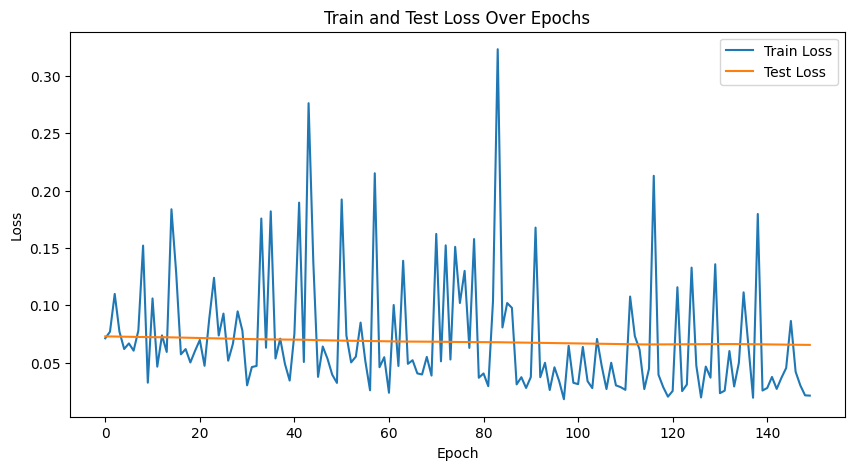

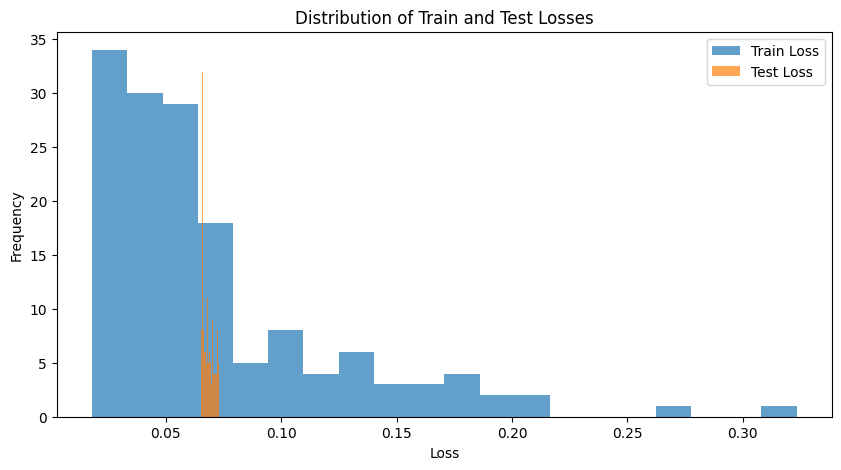

In [ ]:
import matplotlib.pyplot as plt

# Training loop with loss recording
num_epochs = 150
train_losses = []
test_losses = []

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0

    for input_batch in tqdm(train_data, desc=f"Epoch {epoch+1}/{num_epochs}"):
        input_ids = tokenizer(input_batch, return_tensors='pt', padding=True, truncation=True).input_ids
        labels = input_ids.clone()

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_data)
    train_losses.append(avg_train_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}")

    # Testing loop
    model.eval()
    total_test_loss = 0

    with torch.no_grad():
        for input_batch in tqdm(test_data, desc="Testing"):
            input_ids = tokenizer(input_batch, return_tensors='pt', padding=True, truncation=True).input_ids
            labels = input_ids.clone()

            outputs = model(input_ids=input_ids, labels=labels)
            loss = outputs.loss
            total_test_loss += loss.item()

        avg_test_loss = total_test_loss / len(test_data)
        test_losses.append(avg_test_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

print('Training completed.')

# Plotting train and test loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Epochs')
plt.legend()
plt.show()

# Distribution of training losses
plt.figure(figsize=(10, 5))
plt.hist(train_losses, bins=20, alpha=0.7, label='Train Loss')
plt.hist(test_losses, bins=20, alpha=0.7, label='Test Loss')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Distribution of Train and Test Losses')
plt.legend()
plt.show()


.///////////////////////////////////////
//////////////////////////////////////////
////////////////////////////////////////////


In [ ]:
!pip install datasets
from datasets import load_dataset

huggingface_dataset_name = "knkarthick/dialogsum"
datasets = load_dataset(huggingface_dataset_name)
datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


Generating train split:   0%|          | 0/12460 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 12460
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 500
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 1500
    })
})

In [ ]:
import pandas as pd


train_df = pd.DataFrame(datasets['train'])
test_df = pd.DataFrame(datasets['test'])
validation_df = pd.DataFrame(datasets['validation'])
پ
with pd.ExcelWriter('dataset.xlsx') as writer:
    train_df.to_excel(writer, sheet_name='train', index=False)
    test_df.to_excel(writer, sheet_name='test', index=False)
    validation_df.to_excel(writer, sheet_name='validation', index=False)


In [ ]:
dd = datasets['train']
dd.__getitem__(0)

{'id': 'train_0',
 'dialogue': "#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. Why are you here today?\n#Person2#: I found it would be a good idea to get a check-up.\n#Person1#: Yes, well, you haven't had one for 5 years. You should have one every year.\n#Person2#: I know. I figure as long as there is nothing wrong, why go see the doctor?\n#Person1#: Well, the best way to avoid serious illnesses is to find out about them early. So try to come at least once a year for your own good.\n#Person2#: Ok.\n#Person1#: Let me see here. Your eyes and ears look fine. Take a deep breath, please. Do you smoke, Mr. Smith?\n#Person2#: Yes.\n#Person1#: Smoking is the leading cause of lung cancer and heart disease, you know. You really should quit.\n#Person2#: I've tried hundreds of times, but I just can't seem to kick the habit.\n#Person1#: Well, we have classes and some medications that might help. I'll give you more information before you leave.\n#Person2#: Ok, thanks doctor.",
 'summary': "Mr. Smith'

# From Here

In [ ]:
import torch
from torch.utils.data import Dataset
df = pd.read_excel("/content/new_combined_file.xlsx")
df.rename(columns={'Answers': 'answer'}, inplace=True)
df.rename(columns={'Questions': 'question'}, inplace=True)
df1 = df['answer'].to_frame()
df2 = df['question'].to_frame()

class CustomDataset(Dataset):
    def __init__(self, df1, df2):
        self.df1 = df1
        self.df2 = df2

    def __len__(self):
        return len(self.df1)

    def __getitem__(self, index):
        question = self.df1.iloc[index]  # Assuming df1 is a pandas DataFrame
        answer = self.df2.iloc[index]    # Assuming df2 is a pandas DataFrame

        # Convert to dictionary
        sample = {'question': question, 'answer': answer}

        return sample


In [ ]:
import pandas as pd
original = pd.read_excel('/content/orginal.xlsx')
original.head()

,پاسخ شکایت,شرح شکایت
0,با سلام و احترام؛ صلاحیت بررسی موضوع بر عهده و...,با سلام از اذر ماه سال گذشته از طرف نظام مهندس...
1,با سلام و احترام؛\nحسب بررسی به عمل آمده در مو...,با سلام، با توجه به اینکه بایستی مبلغ پانصد می...
2,با سلام و احترام ؛ مشتری گرامی در این خصوص با ...,سلام بنده تاریخ ۱۴۰۱/۱۲/۲۷ یه چک به حسابم خواب...
3,با سلام و احترام؛\nصلاحیت بررسی موضوع عنوان شد...,در تاریخ 15 اسفند ماه سال 1401بابت تفاوت تسهیل...
4,با سلام. لطفا مراتب را با ارائه مستندات قابل ق...,اینجانب محسن تاره از یکی کارمندان بانک ملت بنا...


In [ ]:
# Remove numbers from items and remove unAcceptable items
import re
for i in range(0, 2657):
  if type(original['پاسخ شکایت'][i]) == str:
    original['پاسخ شکایت'][i] = re.sub(r'\d+', '', original['پاسخ شکایت'][i])
  else:
    original['پاسخ شکایت'].drop(i, inplace = True)
print(original['پاسخ شکایت'][:100])
print(len(original['پاسخ شکایت']))

for i in range(0, 2657):
  if type(original['شرح شکایت'][i]) == str:
    original['شرح شکایت'][i] = re.sub(r'\d+', '', original['شرح شکایت'][i])
  else:
    original['شرح شکایت'].drop(i, inplace = True)
print(original['شرح شکایت'][:100])
print(len(original['شرح شکایت']))

0     با سلام و احترام؛ صلاحیت بررسی موضوع بر عهده و...
1     با سلام و احترام؛\nحسب بررسی به عمل آمده در مو...
2     با سلام و احترام ؛ مشتری گرامی در این خصوص با ...
3     با سلام و احترام؛\nصلاحیت بررسی موضوع عنوان شد...
4     با سلام. لطفا مراتب را با ارائه مستندات قابل ق...
                            ...                        
95                    پاسخ مقتضی در این خصوص ارائه شد .
96    با سلام. مشتری گرامی  لطفا مراتب را به اداره ب...
97    با سلام و احترام ؛ مشتری گرامی در این خصوص با ...
98    با سلام و احترام ؛ مشتری گرامی در این خصوص با ...
99    با سلام و احترام ؛\nمشتری گرامی حسب بررسی و اع...
Name: پاسخ شکایت, Length: 100, dtype: object
2657
0     با سلام از اذر ماه سال گذشته از طرف نظام مهندس...
1     با سلام، با توجه به اینکه بایستی مبلغ پانصد می...
2     سلام بنده تاریخ // یه چک به حسابم خوابوندم متا...
3     در تاریخ  اسفند ماه سال بابت تفاوت تسهیلات مسک...
4     اینجانب محسن تاره از یکی کارمندان بانک ملت بنا...
                            ...                       

In [ ]:
!pip install googletrans==4.0.0rc1

In [ ]:
from googletrans import Translator
translator = Translator()
tl_1 = []
tl_2 = []

for i in original['پاسخ شکایت']:
    i = translator.translate(i, src="fa", dest="en").text
    tl_1.append(i)

print(f"{tl_1[:2]}\n")

for j in original['شرح شکایت']:
    j = translator.translate(j, src="fa", dest="en").text
    tl_2.append(j)

print(f"{tl_2[:2]}\n")

AttributeError: 'Translator' object has no attribute 'raise_Exception'

In [ ]:
df1 = pd.Series(tl_1).to_frame()
df2 = pd.Series(tl_2).to_frame()

In [ ]:
mydataset = CustomDataset(df1, df2)

In [ ]:
mydataset.__getitem__(2)

In [ ]:
from sklearn.model_selection import train_test_split
df1_train, df1_test, df2_train, df2_test = train_test_split(df1, df2, test_size=0.2)

In [ ]:
train_data = CustomDataset(df1_train, df2_train)
test_data = CustomDataset(df1_test, df2_test)

In [ ]:
datasetDict = {'train': train_data, 'test': test_data}

In [ ]:
type(datasetDict)

NameError: name 'datasetDict' is not defined

In [ ]:
!pip install transformers torch peft openpyxl googletrans==4.0.0-rc1

# Import libraries
import openpyxl as pyx
import pandas as pd
import re
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch
from peft import get_peft_model, LoraConfig, TaskType
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from googletrans import Translator
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Define LoRA configuration and wrap the T5 model with LoRA
lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    r=8,  # Rank of the low-rank matrices
    lora_alpha=16,  # Alpha parameter
    lora_dropout=0.1,  # Dropout rate for LoRA layers
)
model = T5ForConditionalGeneration.from_pretrained("t5-small")
model = get_peft_model(model, lora_config)

# Split data into training and testing sets
data_list = new_answers
train_data, test_data = train_test_split(data_list, test_size=0.2, random_state=42)

# Training loop
num_epochs = 150
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0

    for input_batch in tqdm(train_data, desc=f"Epoch {epoch+1}/{num_epochs}"):
        input_ids = tokenizer(input_batch, return_tensors='pt', padding=True, truncation=True).input_ids
        labels = input_ids.clone()

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_data)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}")

    # Testing loop
    model.eval()
    total_test_loss = 0

    with torch.no_grad():
        for input_batch in tqdm(test_data, desc="Testing"):
            input_ids = tokenizer(input_batch, return_tensors='pt', padding=True, truncation=True).input_ids
            labels = input_ids.clone()

            outputs = model(input_ids=input_ids, labels=labels)
            loss = outputs.loss
            total_test_loss += loss.item()

        avg_test_loss = total_test_loss / len(test_data)
        print(f"Epoch {epoch+1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

print('Training completed.')

# Function to ask and get answer from the model
def ask_question(question):
    model.eval()
    with torch.no_grad():
        input_ids = tokenizer(question, return_tensors='pt', padding=True, truncation=True).input_ids
        generated_ids = model.model.generate(input_ids)
        answer = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
        return translator.translate(answer, src="en", dest="fa").text

# Example usage
while True:
    user_input = input("Ask a question: ")
    user_input_translated = translator.translate(user_input, src="fa", dest="en").text
    if user_input_translated.lower() in ["exit", "quit"]:
        break
    response = ask_question(user_input_translated)
    print("Answer:", response)


گامل

In [ ]:
# Install necessary libraries
!pip install deep-translator transformers torch peft openpyxl

import pandas as pd
import re
from deep_translator import GoogleTranslator
from torch.utils.data import Dataset, DataLoader
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch
from peft import get_peft_model, LoraConfig, TaskType
from sklearn.model_selection import train_test_split
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 9.2 MB/s eta 0:00:00


In [ ]:


# Define the custom dataset class
class CustomDataset(Dataset):
    def __init__(self, df1, df2):
        self.df1 = df1
        self.df2 = df2

    def __len__(self):
        return len(self.df1)

    def __getitem__(self, index):
        question = self.df1.iloc[index].item()
        answer = self.df2.iloc[index].item()
        sample = {'question': question, 'answer': answer}
        return sample

# Read the data
original = pd.read_excel('/content/orginal.xlsx')

# Remove numbers and unAcceptable items
original['پاسخ شکایت'] = original['پاسخ شکایت'].apply(lambda x: re.sub(r'\d+', '', x) if isinstance(x, str) else None)
original = original.dropna(subset=['پاسخ شکایت'])

original['شرح شکایت'] = original['شرح شکایت'].apply(lambda x: re.sub(r'\d+', '', x) if isinstance(x, str) else None)
original = original.dropna(subset=['شرح شکایت'])

# Translate the data using deep-translator
translator = GoogleTranslator(source='fa', target='en')
tl_1 = [translator.translate(text) for text in original['پاسخ شکایت']]
tl_2 = [translator.translate(text) for text in original['شرح شکایت']]

# Create dataframes
df1 = pd.Series(tl_1).to_frame()
df2 = pd.Series(tl_2).to_frame()

# Split data into training and testing sets
df1_train, df1_test, df2_train, df2_test = train_test_split(df1, df2, test_size=0.2, random_state=42)
train_data = CustomDataset(df1_train, df2_train)
test_data = CustomDataset(df1_test, df2_test)
datasetDict = {'train': train_data, 'test': test_data}

# Initialize the tokenizer and model with LoRA configuration
tokenizer = T5Tokenizer.from_pretrained("t5-small")
lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    r=8,  # Rank of the low-rank matrices
    lora_alpha=16,  # Alpha parameter
    lora_dropout=0.1,  # Dropout rate for LoRA layers
)
model = T5ForConditionalGeneration.from_pretrained("t5-small")
model = get_peft_model(model, lora_config)

# Training and evaluation
num_epochs = 10  # Reduced for testing purposes
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        questions = [item['question'] for item in batch]
        answers = [item['answer'] for item in batch]
        input_ids = tokenizer(questions, return_tensors='pt', padding=True, truncation=True).input_ids
        labels = tokenizer(answers, return_tensors='pt', padding=True, truncation=True).input_ids

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}")

    model.eval()
    total_test_loss = 0

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing"):
            questions = [item['question'] for item in batch]
            answers = [item['answer'] for item in batch]
            input_ids = tokenizer(questions, return_tensors='pt', padding=True, truncation=True).input_ids
            labels = tokenizer(answers, return_tensors='pt', padding=True, truncation=True).input_ids

            outputs = model(input_ids=input_ids, labels=labels)
            loss = outputs.loss
            total_test_loss += loss.item()

        avg_test_loss = total_test_loss / len(test_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

print('Training completed.')

# Function to ask and get answer from the model
def ask_question(question):
    model.eval()
    with torch.no_grad():
        input_ids = tokenizer(question, return_tensors='pt', padding=True, truncation=True).input_ids
        generated_ids = model.generate(input_ids)
        answer = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
        return GoogleTranslator(source='en', target='fa').translate(answer)

# Example usage
while True:
    user_input = input("Ask a question: ")
    user_input_translated = GoogleTranslator(source='fa', target='en').translate(user_input)
    if user_input_translated.lower() in ["exit", "quit"]:
        break
    response = ask_question(user_input_translated)
    print("Answer:", response)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Epoch 1/10:   0%|          | 0/238 [00:00<?, ?it/s]


KeyError: ' questions'

# DIVIDER

In [ ]:
! pip install peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 22.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from peft import get_peft_model, LoraConfig, TaskType
from transformers import T5Tokenizer, T5ForConditionalGeneration, AutoTokenizer, AutoModelForSeq2SeqLM
import pandas as pd
from tqdm import tqdm

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        question = self.data.iloc[index]['question']
        answer = self.data.iloc[index]['answer']
        sample = {'question': question, 'answer': answer}
        return sample

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
train_data = CustomDataset(df_train)
test_data = CustomDataset(df_test)
# Assuming train_dataset is an instance of CustomDataset
for i in range(len(test_data)):
    sample = test_data[i]
    print(f"Sample {i}:")
    print(f"Question: {sample['question']}")
    print(f"Answer: {sample['answer']}")
    print("-------------------------")

Sample 0:
Question: About Hours on September: Referring to the branch and receiving the turn of the branch and responding only one (number) by raising this issue with the branch officer while responding to the disrespectful and expressing the "same" position.Bank image with customers seemed to be deliberately due to the offensive behavior of the branch responsible and ignoring the Charter of Honor Customer Bank Mellat Bank I request a change of branch and thanks to the answer to that respected authority and, if necessary, follow up at higher levels.Be
Answer: Greetings and respect, please follow the issue with the branch of the branch - numbers.
-------------------------
Sample 1:
Question: Hello today: I called this branch and asked to re -leave the check and say that Clare is not responsible for tomorrow, but this check was millions of dollars and I needed this money early in the morning.Not to say and say work is not responsible
Answer: Baslam respect, please refer to your issue wit

In [ ]:
datasetDict = {'train': train_data, 'test': test_data}
for split_name, dataset in datasetDict.items():
    print(f"Dataset: {split_name}")
    for i in range(len(dataset)):
        sample = dataset[i]
        print(f"Sample {i}:")
        print(f"Question: {sample['question']}")
        print(f"Answer: {sample['answer']}")
        print("-------------------------")

Streaming output truncated to the last 5000 lines.
I have received a year -long refund facility and paid about the bank totaling about a million years during the year, but the head of the Central Bank of Jahrom claimed another million tomans, which finally filed a lawsuit in court only millions of USD.The bank's claim was deducted and the bank was deducted. The conviction was deducted and paid to the bank. Now, after the month of the case, the bank's bachelor's fee of the lawyer's division of the lawyer's right to a million tomans to the amount of millions of tomanThe claim was rejected, claiming that it was responsible for the fact that by blocking the account and seizing the vehicle through the Office of Documents and Roads, they had to obtain a thousand dollars in order to remove the account and property of the accounts and property.In other words, the cost of the bank employee's mistakes after the settlement has again been re -paid in the form of al -Wakaleh I have been repaid agai

In [ ]:
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)
# Example of iterating through train_loader
print("Visualizing train_data:")
for idx in range(len(train_data)):
    sample = train_data[idx]
    question = sample['question']
    answer = sample['answer']

    print(f"Sample {idx}:")
    print(f"Question: {question}")
    print(f"Answer: {answer}")
    print("-------------------------")

# Example of iterating through test_loader
print("Testing DataLoader:")
for batch_idx, batch in enumerate(test_loader):
    questions = batch['question']
    answers = batch['answer']

    print(f"Batch {batch_idx}:")
    for i in range(len(questions)):
        print(f"Question: {questions[i]}")
        print(f"Answer: {answers[i]}")
        print("-------------------------")

Streaming output truncated to the last 5000 lines.
-------------------------
Sample 1392:
Question: Greetings and polite
According to the domestic car sales support plan, we went to the branch, and the employee based on the second left -hander, who was Mr. Javan, announced that I had a lawyer, pretended to work, so registering for registration.Rejuvenated Refer to Branch. The same young man claims that we did our job. Your broker did not do anything.You would call you a lawyer.
But what a pity it treats it is expected to be in the affairs of these experienced people, not an inexperienced person who is both expensive and the time of my servant.
Finally, it is recommended that such shortcomings cause the customer to escape
I Allah Almighty
Answer: Baslam, please submit your complaint with the Inspectorate of Tehran District 4 to the numbers and numbers.
-------------------------
Sample 1393:
Question: in the name of God
Hello
Hassan Hassan Reza Kamdali I received a contract /a monthly cr

In [ ]:
############################################################################
def collate_fn(batch):
    questions = [item['question'] for item in batch]
    answers = [item['answer'] for item in batch]

    # Tokenize questions and answers
    inputs = tokenizer(questions, return_tensors='pt', padding=True, truncation=True)
    labels = tokenizer(answers, return_tensors='pt', padding=True, truncation=True).input_ids

    return {
        'input_ids': inputs.input_ids,
        'attention_mask': inputs.attention_mask,
        'labels': labels
    }

# Create DataLoader instances with collate_fn
train_loader = DataLoader(train_data, batch_size=8, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False, collate_fn=collate_fn)

In [ ]:
# Initialize the tokenizer and model with LoRA configuration
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    r=8,  # Rank of the low-rank matrices
    lora_alpha=16,  # Alpha parameter
    lora_dropout=0.1,  # Dropout rate for LoRA layers
)
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")
model = get_peft_model(model, lora_config)

# Training and evaluation
#num_epochs = 10  # Reduced for testing purposes
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.train()

PeftModelForSeq2SeqLM(
  (base_model): LoraModel(
    (model): T5ForConditionalGeneration(
      (shared): Embedding(32128, 768)
      (encoder): T5Stack(
        (embed_tokens): Embedding(32128, 768)
        (block): ModuleList(
          (0): T5Block(
            (layer): ModuleList(
              (0): T5LayerSelfAttention(
                (SelfAttention): T5Attention(
                  (q): lora.Linear(
                    (base_layer): Linear(in_features=768, out_features=768, bias=False)
                    (lora_dropout): ModuleDict(
                      (default): Dropout(p=0.1, inplace=False)
                    )
                    (lora_A): ModuleDict(
                      (default): Linear(in_features=768, out_features=8, bias=False)
                    )
                    (lora_B): ModuleDict(
                      (default): Linear(in_features=8, out_features=768, bias=False)
                    )
                    (lora_embedding_A): ParameterDict()
               

num_epochs = 3
for epoch in range(num_epochs):
    total_train_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Train Loss: {avg_train_loss:.4f}")

# Evaluation loop
model.eval()
total_test_loss = 0

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_test_loss += loss.item()

    avg_test_loss = total_test_loss / len(test_loader)
    print(f"Average Test Loss: {avg_test_loss:.4f}")

print('Training and Evaluation completed.')

In [ ]:
best_test_loss = float('inf')
patience = 3  # Number of epochs to wait for improvement
num_epochs = 0

while True:
    num_epochs += 1
    total_train_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {num_epochs}"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    print(f"Epoch {num_epochs}, Average Train Loss: {avg_train_loss:.4f}")

    # Evaluation loop
    model.eval()
    total_test_loss = 0

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_test_loss += loss.item()

        avg_test_loss = total_test_loss / len(test_loader)
        print(f"Average Test Loss: {avg_test_loss:.4f}")

        # Check for early stopping
        if avg_test_loss < best_test_loss:
            best_test_loss = avg_test_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pt')  # Save the best model
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping after epoch {num_epochs} with no improvement.")
                break

    model.train()

print('Training completed with early stopping.')

Epoch 1: 100%|██████████| 238/238 [01:50<00:00,  2.15it/s]


Epoch 1, Average Train Loss: 12.1035


Testing: 100%|██████████| 60/60 [00:11<00:00,  5.04it/s]


Average Test Loss: 4.6531


Epoch 2: 100%|██████████| 238/238 [01:51<00:00,  2.13it/s]


Epoch 2, Average Train Loss: 4.5505


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.96it/s]


Average Test Loss: 3.9578


Epoch 3: 100%|██████████| 238/238 [01:50<00:00,  2.15it/s]


Epoch 3, Average Train Loss: 3.7357


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.95it/s]


Average Test Loss: 2.5591


Epoch 4: 100%|██████████| 238/238 [01:49<00:00,  2.18it/s]


Epoch 4, Average Train Loss: 2.7100


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.97it/s]


Average Test Loss: 1.9079


Epoch 5: 100%|██████████| 238/238 [01:52<00:00,  2.12it/s]


Epoch 5, Average Train Loss: 2.1208


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.97it/s]


Average Test Loss: 1.6623


Epoch 6: 100%|██████████| 238/238 [01:52<00:00,  2.12it/s]


Epoch 6, Average Train Loss: 1.8381


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.97it/s]


Average Test Loss: 1.5091


Epoch 7: 100%|██████████| 238/238 [01:50<00:00,  2.16it/s]


Epoch 7, Average Train Loss: 1.6966


Testing: 100%|██████████| 60/60 [00:12<00:00,  5.00it/s]


Average Test Loss: 1.3858


Epoch 8: 100%|██████████| 238/238 [01:50<00:00,  2.16it/s]


Epoch 8, Average Train Loss: 1.5706


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 1.2844


Epoch 9: 100%|██████████| 238/238 [01:53<00:00,  2.10it/s]


Epoch 9, Average Train Loss: 1.4406


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.99it/s]


Average Test Loss: 1.2017


Epoch 10: 100%|██████████| 238/238 [01:51<00:00,  2.13it/s]


Epoch 10, Average Train Loss: 1.3618


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.94it/s]


Average Test Loss: 1.1443


Epoch 11: 100%|██████████| 238/238 [01:50<00:00,  2.15it/s]


Epoch 11, Average Train Loss: 1.2788


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.97it/s]


Average Test Loss: 1.1026


Epoch 12: 100%|██████████| 238/238 [01:51<00:00,  2.14it/s]


Epoch 12, Average Train Loss: 1.2370


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 1.0733


Epoch 13: 100%|██████████| 238/238 [01:52<00:00,  2.12it/s]


Epoch 13, Average Train Loss: 1.1991


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.97it/s]


Average Test Loss: 1.0394


Epoch 14: 100%|██████████| 238/238 [01:52<00:00,  2.12it/s]


Epoch 14, Average Train Loss: 1.1532


Testing: 100%|██████████| 60/60 [00:11<00:00,  5.02it/s]


Average Test Loss: 1.0205


Epoch 15: 100%|██████████| 238/238 [01:50<00:00,  2.14it/s]


Epoch 15, Average Train Loss: 1.1386


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 1.0048


Epoch 16: 100%|██████████| 238/238 [01:50<00:00,  2.16it/s]


Epoch 16, Average Train Loss: 1.0944


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.97it/s]


Average Test Loss: 0.9875


Epoch 17: 100%|██████████| 238/238 [01:51<00:00,  2.13it/s]


Epoch 17, Average Train Loss: 1.0737


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.97it/s]


Average Test Loss: 0.9756


Epoch 18: 100%|██████████| 238/238 [01:50<00:00,  2.16it/s]


Epoch 18, Average Train Loss: 1.0539


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.97it/s]


Average Test Loss: 0.9667


Epoch 19: 100%|██████████| 238/238 [01:49<00:00,  2.16it/s]


Epoch 19, Average Train Loss: 1.0460


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 0.9542


Epoch 20: 100%|██████████| 238/238 [01:51<00:00,  2.14it/s]


Epoch 20, Average Train Loss: 1.0381


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.94it/s]


Average Test Loss: 0.9384


Epoch 21: 100%|██████████| 238/238 [01:50<00:00,  2.15it/s]


Epoch 21, Average Train Loss: 1.0141


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.96it/s]


Average Test Loss: 0.9292


Epoch 22: 100%|██████████| 238/238 [01:49<00:00,  2.17it/s]


Epoch 22, Average Train Loss: 1.0003


Testing: 100%|██████████| 60/60 [00:12<00:00,  5.00it/s]


Average Test Loss: 0.9245


Epoch 23: 100%|██████████| 238/238 [01:51<00:00,  2.13it/s]


Epoch 23, Average Train Loss: 0.9870


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 0.9145


Epoch 24: 100%|██████████| 238/238 [01:51<00:00,  2.13it/s]


Epoch 24, Average Train Loss: 0.9703


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.97it/s]


Average Test Loss: 0.9068


Epoch 25: 100%|██████████| 238/238 [01:52<00:00,  2.12it/s]


Epoch 25, Average Train Loss: 0.9468


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.96it/s]


Average Test Loss: 0.8981


Epoch 26: 100%|██████████| 238/238 [01:49<00:00,  2.16it/s]


Epoch 26, Average Train Loss: 0.9560


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.99it/s]


Average Test Loss: 0.8927


Epoch 27: 100%|██████████| 238/238 [01:51<00:00,  2.13it/s]


Epoch 27, Average Train Loss: 0.9332


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 0.8881


Epoch 28: 100%|██████████| 238/238 [01:50<00:00,  2.15it/s]


Epoch 28, Average Train Loss: 0.9271


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 0.8794


Epoch 29: 100%|██████████| 238/238 [01:50<00:00,  2.15it/s]


Epoch 29, Average Train Loss: 0.9059


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.99it/s]


Average Test Loss: 0.8784


Epoch 30: 100%|██████████| 238/238 [01:49<00:00,  2.17it/s]


Epoch 30, Average Train Loss: 0.9142


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 0.8723


Epoch 31: 100%|██████████| 238/238 [01:50<00:00,  2.16it/s]


Epoch 31, Average Train Loss: 0.9000


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.97it/s]


Average Test Loss: 0.8685


Epoch 32: 100%|██████████| 238/238 [01:50<00:00,  2.14it/s]


Epoch 32, Average Train Loss: 0.9024


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.95it/s]


Average Test Loss: 0.8661


Epoch 33: 100%|██████████| 238/238 [01:52<00:00,  2.12it/s]


Epoch 33, Average Train Loss: 0.8869


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 0.8584


Epoch 34: 100%|██████████| 238/238 [01:51<00:00,  2.13it/s]


Epoch 34, Average Train Loss: 0.9000


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 0.8519


Epoch 35: 100%|██████████| 238/238 [01:52<00:00,  2.11it/s]


Epoch 35, Average Train Loss: 0.8814


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 0.8489


Epoch 36: 100%|██████████| 238/238 [01:53<00:00,  2.10it/s]


Epoch 36, Average Train Loss: 0.8750


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 0.8502


Epoch 37: 100%|██████████| 238/238 [01:51<00:00,  2.14it/s]


Epoch 37, Average Train Loss: 0.8643


Testing: 100%|██████████| 60/60 [00:12<00:00,  5.00it/s]


Average Test Loss: 0.8482


Epoch 38: 100%|██████████| 238/238 [01:51<00:00,  2.13it/s]


Epoch 38, Average Train Loss: 0.8578


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.97it/s]


Average Test Loss: 0.8394


Epoch 39: 100%|██████████| 238/238 [01:51<00:00,  2.13it/s]


Epoch 39, Average Train Loss: 0.8687


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 0.8402


Epoch 40: 100%|██████████| 238/238 [01:50<00:00,  2.15it/s]


Epoch 40, Average Train Loss: 0.8579


Testing: 100%|██████████| 60/60 [00:12<00:00,  5.00it/s]


Average Test Loss: 0.8373


Epoch 41: 100%|██████████| 238/238 [01:51<00:00,  2.14it/s]


Epoch 41, Average Train Loss: 0.8324


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.95it/s]


Average Test Loss: 0.8368


Epoch 42: 100%|██████████| 238/238 [01:51<00:00,  2.14it/s]


Epoch 42, Average Train Loss: 0.8528


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.99it/s]


Average Test Loss: 0.8337


Epoch 43: 100%|██████████| 238/238 [01:51<00:00,  2.14it/s]


Epoch 43, Average Train Loss: 0.8290


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.95it/s]


Average Test Loss: 0.8275


Epoch 44: 100%|██████████| 238/238 [01:49<00:00,  2.17it/s]


Epoch 44, Average Train Loss: 0.8253


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.99it/s]


Average Test Loss: 0.8252


Epoch 45: 100%|██████████| 238/238 [01:50<00:00,  2.15it/s]


Epoch 45, Average Train Loss: 0.8373


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.93it/s]


Average Test Loss: 0.8227


Epoch 46: 100%|██████████| 238/238 [01:50<00:00,  2.15it/s]


Epoch 46, Average Train Loss: 0.8278


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.96it/s]


Average Test Loss: 0.8194


Epoch 47: 100%|██████████| 238/238 [01:50<00:00,  2.15it/s]


Epoch 47, Average Train Loss: 0.8203


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.96it/s]


Average Test Loss: 0.8173


Epoch 48: 100%|██████████| 238/238 [01:51<00:00,  2.13it/s]


Epoch 48, Average Train Loss: 0.8195


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.95it/s]


Average Test Loss: 0.8264


Epoch 49: 100%|██████████| 238/238 [01:50<00:00,  2.15it/s]


Epoch 49, Average Train Loss: 0.8100


Testing: 100%|██████████| 60/60 [00:11<00:00,  5.00it/s]


Average Test Loss: 0.8161


Epoch 50: 100%|██████████| 238/238 [01:52<00:00,  2.11it/s]


Epoch 50, Average Train Loss: 0.8115


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 0.8099


Epoch 51: 100%|██████████| 238/238 [01:51<00:00,  2.13it/s]


Epoch 51, Average Train Loss: 0.8091


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 0.8111


Epoch 52: 100%|██████████| 238/238 [01:49<00:00,  2.17it/s]


Epoch 52, Average Train Loss: 0.8145


Testing: 100%|██████████| 60/60 [00:12<00:00,  5.00it/s]


Average Test Loss: 0.8103


Epoch 53: 100%|██████████| 238/238 [01:52<00:00,  2.11it/s]


Epoch 53, Average Train Loss: 0.7924


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.98it/s]


Average Test Loss: 0.8083


Epoch 54: 100%|██████████| 238/238 [01:50<00:00,  2.16it/s]


Epoch 54, Average Train Loss: 0.7968


Testing: 100%|██████████| 60/60 [00:12<00:00,  4.93it/s]


Average Test Loss: 0.8058


Epoch 55: 100%|██████████| 238/238 [01:50<00:00,  2.15it/s]


Epoch 55, Average Train Loss: 0.7904


Testing: 100%|██████████| 60/60 [00:11<00:00,  5.01it/s]


Average Test Loss: 0.8054


Epoch 56:  41%|████      | 98/238 [00:46<01:06,  2.11it/s]


KeyboardInterrupt: 

In [ ]:
# Save the model state dictionary
torch.save(model.state_dict(), 'best_model.pt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/best_model.pt')


## When we want to load model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import torch
from your_model_file import YourModelClass  # Import your model class

# Create the model instance
model = YourModelClass()

# Load the state dictionary
model.load_state_dict(torch.load('/content/drive/MyDrive/best_model.pt'))

# Move the model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Set the model to evaluation mode if needed
model.eval()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ModuleNotFoundError: No module named 'your_model_file'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Use force_remount=True if necessary

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Replace with your actual model name and class
model_name = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Load the state dictionary
####model.load_state_dict(torch.load('/content/drive/MyDrive/best_model.pt', map_location=device))

# Move the model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
!pip install transformers torch peft openpyxl googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 11.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=e9a5449c463e4afadb6166bbda4b73a0a648fbfa0656539dba6660613a024946
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling

In [ ]:
!pip install deep-translator
from deep_translator import GoogleTranslator


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.2 MB/s eta 0:00:00


In [ ]:
model.eval()

# Now you can use your model for inference
def ask_question(question):
    model.eval()
    with torch.no_grad():
        input_ids = tokenizer(question, return_tensors='pt', padding=True, truncation=True).to(device)
        generated_ids = model.generate(input_ids.input_ids)
        answer = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
        return GoogleTranslator(source='en', target='fa').translate(answer)

# Example usage
while True:
    user_input = input("Ask a question: ")
    user_input_translated = GoogleTranslator(source='fa', target='en').translate(user_input)
    if user_input_translated.lower() in ["exit", "quit"]:
        break
    response = ask_question(user_input_translated)
    print("Answer:", response)


Ask a question: وام مسکن که چند سال پیش گرفتیم ودوتا ضامن میخواست /بعلت داشتن تنها یک ضامن -50میلیون بعنوان ضامن دربانک گرو گذاشته وغیرقابل برداشت میباشد/درحال حاضر خواهان برداشت وجه بودیم وبه تبع گذاشتن ضامن برای وام/اما بانک مخالفت نموده وگفتن غیرقابل برداشته باوجود اوردن ضامن دوم/خواهشمند است همکاری لازم بعمل اورید


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Answer: یا / ضامن بانک نپذیرفت و گفت
Ask a question: بسمه تعالی  ریاست محترم بازرسی بانک ملت  سلام علیکم اینجانب سید ابوالفضل حسینی خواهان افتتاح حساب در بانک ملت شعبه مذکور می باشم که با تماس با این شعبه بنده را به علت عدم دسترسی به مشخصات و مدارک اتباع ارجاع به شعبه ارزی میدان توحید یا پارس خودرو می دهند خواهشمند است رسیدگی بفرمایید نوع مدرک اقامتی بنده دفترچه اقامت ویژه سبز رنگ می باشد
Answer: ،،،،،،، ریاست محترم
Ask a question: بسمه تعالی  ریاست محترم بازرسی بانک ملت  سلام علیکم اینجانب سید ابوالفضل حسینی خواهان افتتاح حساب در بانک ملت شعبه مذکور می باشم که با تماس با این شعبه بنده را به علت عدم دسترسی به مشخصات و مدارک اتباع ارجاع به شعبه ارزی میدان توحید یا پارس خودرو می دهند خواهشمند است رسیدگی بفرمایید نوع مدرک اقامتی بنده دفترچه اقامت ویژه سبز رنگ می باشد
Answer: ،،،،،،، ریاست محترم
Ask a question: باسلام احتراما اینجانب رضا یعقوب پور وام درتاریخ ۲۱ اسفند۹۸ ی وام گرفتم و اولین قسط از وام کسر شد متعاقب آن ۳۵ قسط پرداخت کردم که آخرین قسط بهمن ماه ۱۴۰۱از حقوق کسر شده متاسفانه بان

KeyboardInterrupt: Interrupted by user

import matplotlib.pyplot as plt

best_test_loss = float('inf')
patience = 3  # Number of epochs to wait for improvement
num_epochs = 0
patience_counter = 0

train_losses = []
test_losses = []

while True:
    num_epochs += 1
    total_train_loss = 0

    # Training loop
    for batch in tqdm(train_loader, desc=f"Epoch {num_epochs}"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"Epoch {num_epochs}, Average Train Loss: {avg_train_loss:.4f}")

    # Evaluation loop
    model.eval()
    total_test_loss = 0

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_test_loss += loss.item()

    avg_test_loss = total_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    print(f"Average Test Loss: {avg_test_loss:.4f}")

    # Check for early stopping
    if avg_test_loss < best_test_loss:
        best_test_loss = avg_test_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pt')  # Save the best model
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping after epoch {num_epochs} with no improvement.")
            break

    model.train()

print('Training completed with early stopping.')

# Plotting the training and test loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()


# DIVIDER

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, df1, df2):
        self.df1 = df1
        self.df2 = df2

    def __len__(self):
        return len(self.df1)

    def __getitem__(self, index):
        question = self.df1.iloc[index]  # Assuming df1 is a pandas DataFrame
        answer = self.df2.iloc[index]    # Assuming df2 is a pandas DataFrame

        # Convert to dictionary
        sample = {'question': question, 'answer': answer}

        return sample

In [ ]:
df1_train, df1_test, df2_train, df2_test = train_test_split(df1, df2, test_size=0.2, random_state=42)
train_data = CustomDataset(df1_train, df2_train)
test_data = CustomDataset(df1_test, df2_test)
# Assuming train_dataset is an instance of CustomDataset
for i in range(len(test_data)):
    sample = test_data[i]
    print(f"Sample {i}:")
    print(f"Question: {sample['question']}")
    print(f"Answer: {sample['answer']}")
    print("-------------------------")

Sample 0:
Question: answer    Greetings and respect, please follow the issue...
Name: 2053, dtype: object
Answer: question    About Hours on September: Referring to the bra...
Name: 2053, dtype: object
-------------------------
Sample 1:
Question: answer    Baslam respect, please refer to your issue wit...
Name: 1812, dtype: object
Answer: question    Hello today: I called this branch and asked to...
Name: 1812, dtype: object
-------------------------
Sample 2:
Question: answer    Greetings and Regards ;\nDear Customer, You ca...
Name: 100, dtype: object
Answer: question    Fatima Goodarzi I am a national statue, in the...
Name: 100, dtype: object
-------------------------
Sample 3:
Question: answer    Hi, please refer to the issue through the Tehr...
Name: 2181, dtype: object
Answer: question    Hi. I am a candidate for billion riyals for th...
Name: 2181, dtype: object
-------------------------
Sample 4:
Question: answer    Hi, in accordance with the bank's regulations,...
Name: 56, 

In [ ]:
datasetDict = {'train': train_data, 'test': test_data}
for split_name, dataset in datasetDict.items():
    print(f"Dataset: {split_name}")
    for i in range(len(dataset)):
        sample = dataset[i]
        print(f"Sample {i}:")
        print(f"Question: {sample['question']}")
        print(f"Answer: {sample['answer']}")
        print("-------------------------")


Streaming output truncated to the last 5000 lines.
-------------------------
Sample 1541:
Question: answer    Greetings and Regards;The jurisdiction of the ...
Name: 1260, dtype: object
Answer: question    Hi good time please modify the Farabank site. ...
Name: 1260, dtype: object
-------------------------
Sample 1542:
Question: answer    Greetings and respect; the jurisdiction of the...
Name: 487, dtype: object
Answer: question    Hello.Did you know that sending any messages f...
Name: 487, dtype: object
-------------------------
Sample 1543:
Question: answer    Baslam, please submit your complaint with the ...
Name: 1624, dtype: object
Answer: question    Hi I took a check to the bank for cash.I asked...
Name: 1624, dtype: object
-------------------------
Sample 1544:
Question: answer    Hello.Dear Customer, there is no need to atten...
Name: 559, dtype: object
Answer: question    Why do you apply for a branch to extend the de...
Name: 559, dtype: object
-------------------------
Sam

In [ ]:
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)
# Example of iterating through train_loader
print("Visualizing train_data:")
for idx in range(len(train_data)):
    sample = train_data[idx]
    question = sample['question']
    answer = sample['answer']

    print(f"Sample {idx}:")
    print(f"Question: {question}")
    print(f"Answer: {answer}")
    print("-------------------------")

# Example of iterating through test_loader
print("Testing DataLoader:")
for batch_idx, batch in enumerate(test_loader):
    questions = batch['question']
    answers = batch['answer']

    print(f"Batch {batch_idx}:")
    for i in range(len(questions)):
        print(f"Question: {questions[i]}")
        print(f"Answer: {answers[i]}")
        print("-------------------------")


Streaming output truncated to the last 5000 lines.
-------------------------
Sample 1066:
Question: answer    Greetings and Regards ;Dear Customer In this r...
Name: 1206, dtype: object
Answer: question    Hi, I went to the June loan to get a check and...
Name: 1206, dtype: object
-------------------------
Sample 1067:
Question: answer    Hi, dear customer, discuss the matter with the...
Name: 1896, dtype: object
Answer: question    Hi don't get tired to you and all the colleagu...
Name: 1896, dtype: object
-------------------------
Sample 1068:
Question: answer    Greetings and Regards;\nDuring a phone call wi...
Name: 110, dtype: object
Answer: question    Hi I have bought a line for nearly two years a...
Name: 110, dtype: object
-------------------------
Sample 1069:
Question: answer    Greetings and Regards ;Dear Customer In this r...
Name: 42, dtype: object
Answer: question    Hi April 5, we won the bank with the amount of...
Name: 42, dtype: object
-------------------------
Sampl

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'pandas.core.series.Series'>

In [ ]:

# Read the data
df = pd.read_excel("/content/new_combined_file.xlsx")
df.rename(columns={'Answers': 'answer'}, inplace=True)
df.rename(columns={'Questions': 'question'}, inplace=True)
df1 = df['answer'].to_frame()
df2 = df['question'].to_frame()
# Split data into training and testing sets
df1_train, df1_test, df2_train, df2_test = train_test_split(df1, df2, test_size=0.2, random_state=42)
train_data = CustomDataset(df1_train, df2_train)
test_data = CustomDataset(df1_test, df2_test)
datasetDict = {'train': train_data, 'test': test_data}

# Initialize the tokenizer and model with LoRA configuration
tokenizer = T5Tokenizer.from_pretrained("t5-small")
lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    r=8,  # Rank of the low-rank matrices
    lora_alpha=16,  # Alpha parameter
    lora_dropout=0.1,  # Dropout rate for LoRA layers
)
model = T5ForConditionalGeneration.from_pretrained("t5-small")
model = get_peft_model(model, lora_config)

# Training and evaluation
num_epochs = 10  # Reduced for testing purposes
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        questions = [item['question'] for item in batch]
        answers = [item['answer'] for item in batch]
        input_ids = tokenizer(questions, return_tensors='pt', padding=True, truncation=True).input_ids
        labels = tokenizer(answers, return_tensors='pt', padding=True, truncation=True).input_ids

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}")

    model.eval()
    total_test_loss = 0

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing"):
            questions = [item['question'] for item in batch]
            answers = [item['answer'] for item in batch]
            input_ids = tokenizer(questions, return_tensors='pt', padding=True, truncation=True).input_ids
            labels = tokenizer(answers, return_tensors='pt', padding=True, truncation=True).input_ids

            outputs = model(input_ids=input_ids, labels=labels)
            loss = outputs.loss
            total_test_loss += loss.item()

        avg_test_loss = total_test_loss / len(test_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

print('Training completed.')

# Function to ask and get answer from the model
def ask_question(question):
    model.eval()
    with torch.no_grad():
        input_ids = tokenizer(question, return_tensors='pt', padding=True, truncation=True).input_ids
        generated_ids = model.generate(input_ids)
        answer = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
        return GoogleTranslator(source='en', target='fa').translate(answer)

# Example usage
while True:
    user_input = input("Ask a question: ")
    user_input_translated = GoogleTranslator(source='fa', target='en').translate(user_input)
    if user_input_translated.lower() in ["exit", "quit"]:
        break
    response = ask_question(user_input_translated)
    print("Answer:", response)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Epoch 1/10:   0%|          | 0/238 [00:00<?, ?it/s]


TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'pandas.core.series.Series'>